In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
# pd.Index(iris.feature_names).str.strip(): Remove qualquer espaço em branco adicional ao redor dos nomes das colunas.
x = pd.DataFrame(iris.data, columns=pd.Index(iris.feature_names).str.strip())
y = pd.Series(iris.target, name='species')

In [25]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
x.shape

(150, 4)

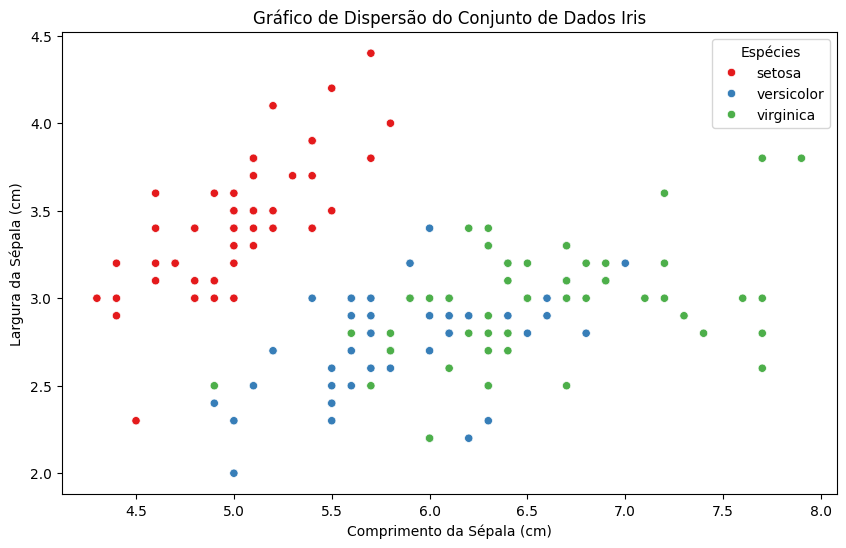

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combinar x e y em um único DataFrame
df = pd.concat([x, y], axis=1)

# Mapeamento das classes para nomes
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title("Gráfico de Dispersão do Conjunto de Dados Iris")
plt.xlabel("Comprimento da Sépala (cm)")
plt.ylabel("Largura da Sépala (cm)")
plt.legend(title='Espécies')
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

norm = MinMaxScaler(feature_range=(0,1))
x_norm = norm.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_norm,y, test_size=0.3, random_state=16)

model = KNeighborsClassifier()
model.fit(x_train, y_train)

k_values = np.array([3, 5, 7, 9, 11])
dist_calc = ['minkowski', 'chebyshev']
p_values = np.array([1, 2, 3, 4])
grid_values = {
    'n_neighbors': k_values,
    'metric': dist_calc,
    'p': p_values
    }

gridknn = GridSearchCV(estimator=model, param_grid=grid_values, cv=5)
gridknn.fit(x_norm, y)

print('Melhor acurácia: ', gridknn.best_score_, '\n',
      'Melhor K: ', gridknn.best_estimator_.n_neighbors ,'\n', 
      'Método de distância: ', gridknn.best_estimator_.effective_metric_, '\n',
      'Melhor P: ', gridknn.best_estimator_.p)

Melhor acurácia:  0.9733333333333334 
 Melhor K:  5 
 Método de distância:  minkowski 
 Melhor P:  3


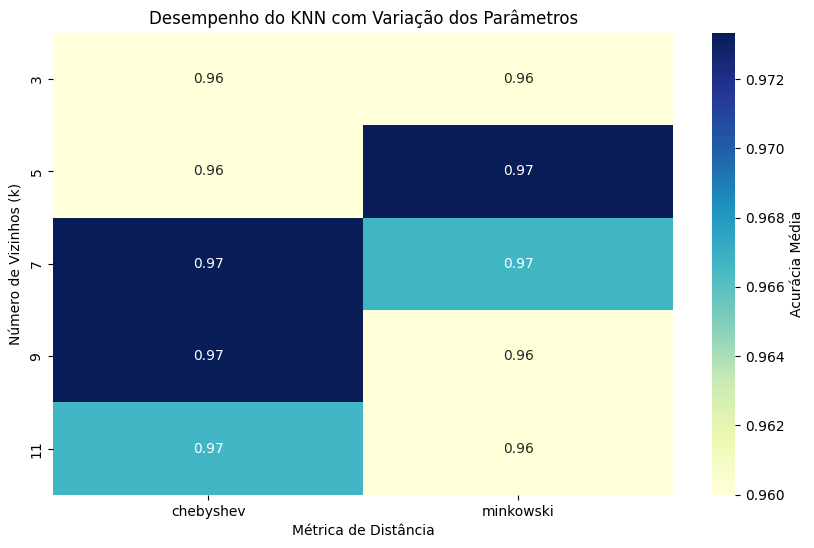

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Transformar os resultados do GridSearchCV em um DataFrame
results = pd.DataFrame(gridknn.cv_results_)

# Filtrar para obter apenas a combinação com melhor score para cada par (n_neighbors, metric)
# Aqui, selecionamos a linha com maior `mean_test_score` para cada combinação de `param_n_neighbors` e `param_metric`
results_filtered = results.loc[results.groupby(['param_n_neighbors', 'param_metric'])['mean_test_score'].idxmax()]

# Criar a tabela pivô para o heatmap
results_pivot = results_filtered.pivot(index='param_n_neighbors', columns='param_metric', values='mean_test_score')

# Plot do heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results_pivot, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Acurácia Média'})
plt.title('Desempenho do KNN com Variação dos Parâmetros')
plt.xlabel('Métrica de Distância')
plt.ylabel('Número de Vizinhos (k)')
plt.show()
